In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
# add the path of the virtual environmentsite-packages to colab system path
sys.path.append("/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages")

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
from glob import iglob

In [ ]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


In [ ]:
# the directory with the `.h5` file
# use gene symbols for the variable names (variables-axis index)
output_data_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat"
output_fig_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat/Figs"
input_dir="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat"
sc.settings.figdir = output_fig_dir

In [ ]:
#read in glial cells
sub_adata = sc.read(os.path.join(input_dir,"glial_class.h5ad"))
print(sub_adata)
sub_smplist = sub_adata.obs_names.tolist()
print(sub_smplist[:3])
raw_adata = sc.read(os.path.join(input_dir,"rat_all_raw_filt.h5ad"))
print(raw_adata)
adata = raw_adata[raw_adata.obs_names.isin(sub_smplist),:]
print(adata)

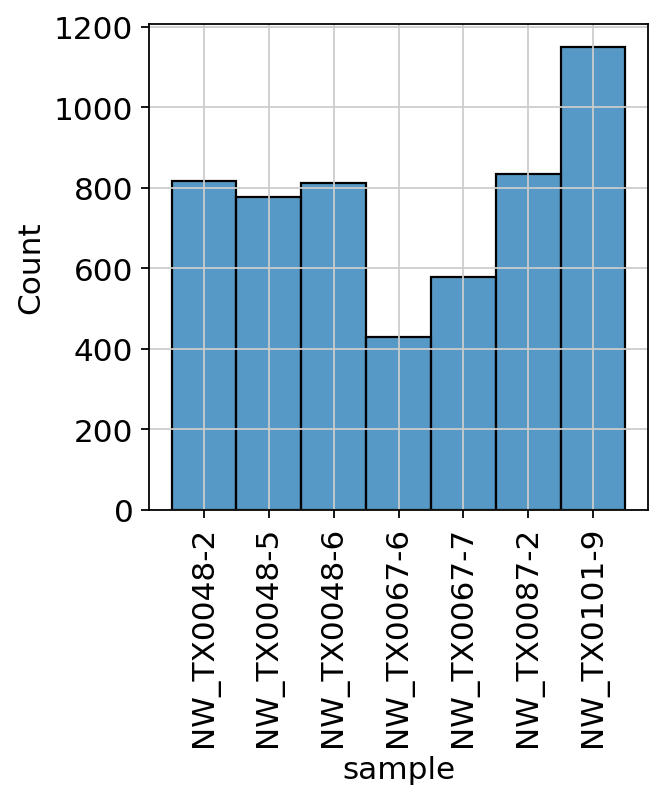

In [ ]:
#print(sub_adata.obs['sample'].value_counts())
#fig, axs = plt.subplots(1,1,figsize=(5,10))
plot = sns.histplot(adata.obs["sample"], kde=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"glial_sample_dist.png"),bbox_inches="tight")

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


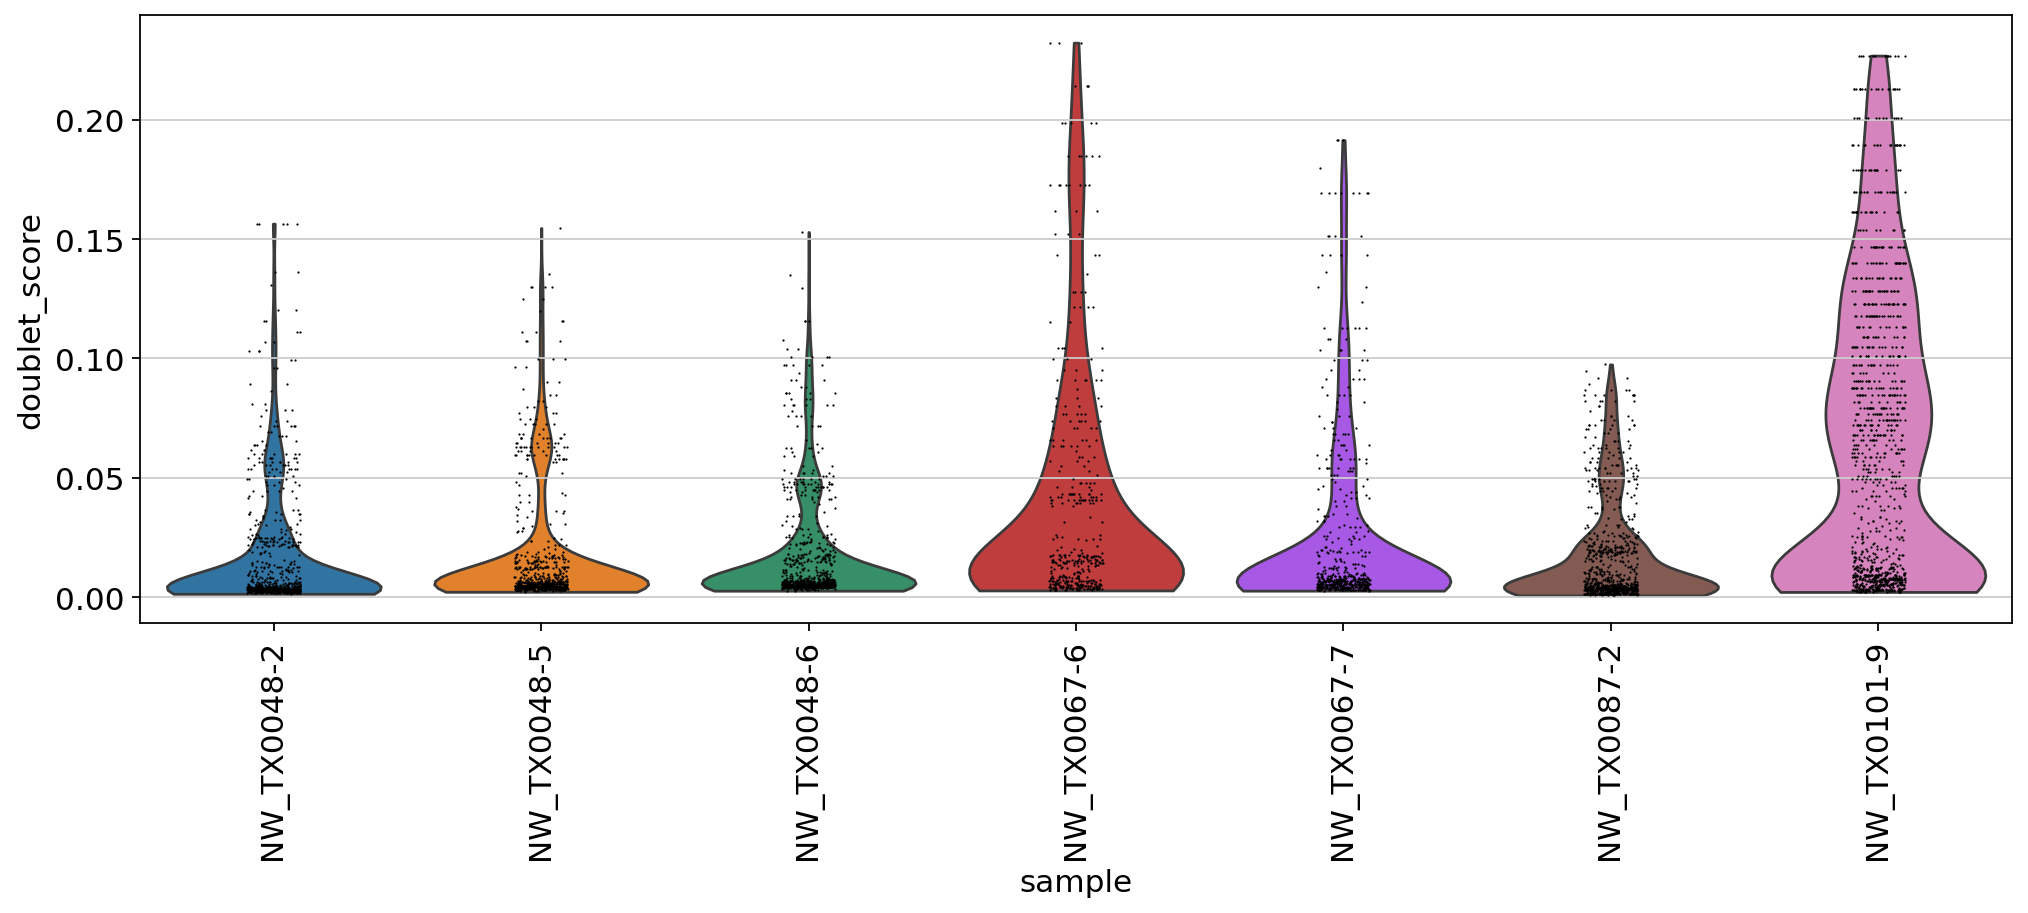

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="doublet_score", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"glial_doublet_score.png"),bbox_inches="tight")

In [ ]:
# calculate percent ribosomal genes
ribo_genes = adata.var_names.str.startswith(("Rps","Rpl"))
print(sum(ribo_genes))
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
## the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
#adata.obs['percent_ribo'] = np.sum(
#    adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
print(adata.var_names[ribo_genes])

False    19982
True        13
Name: mt, dtype: int64


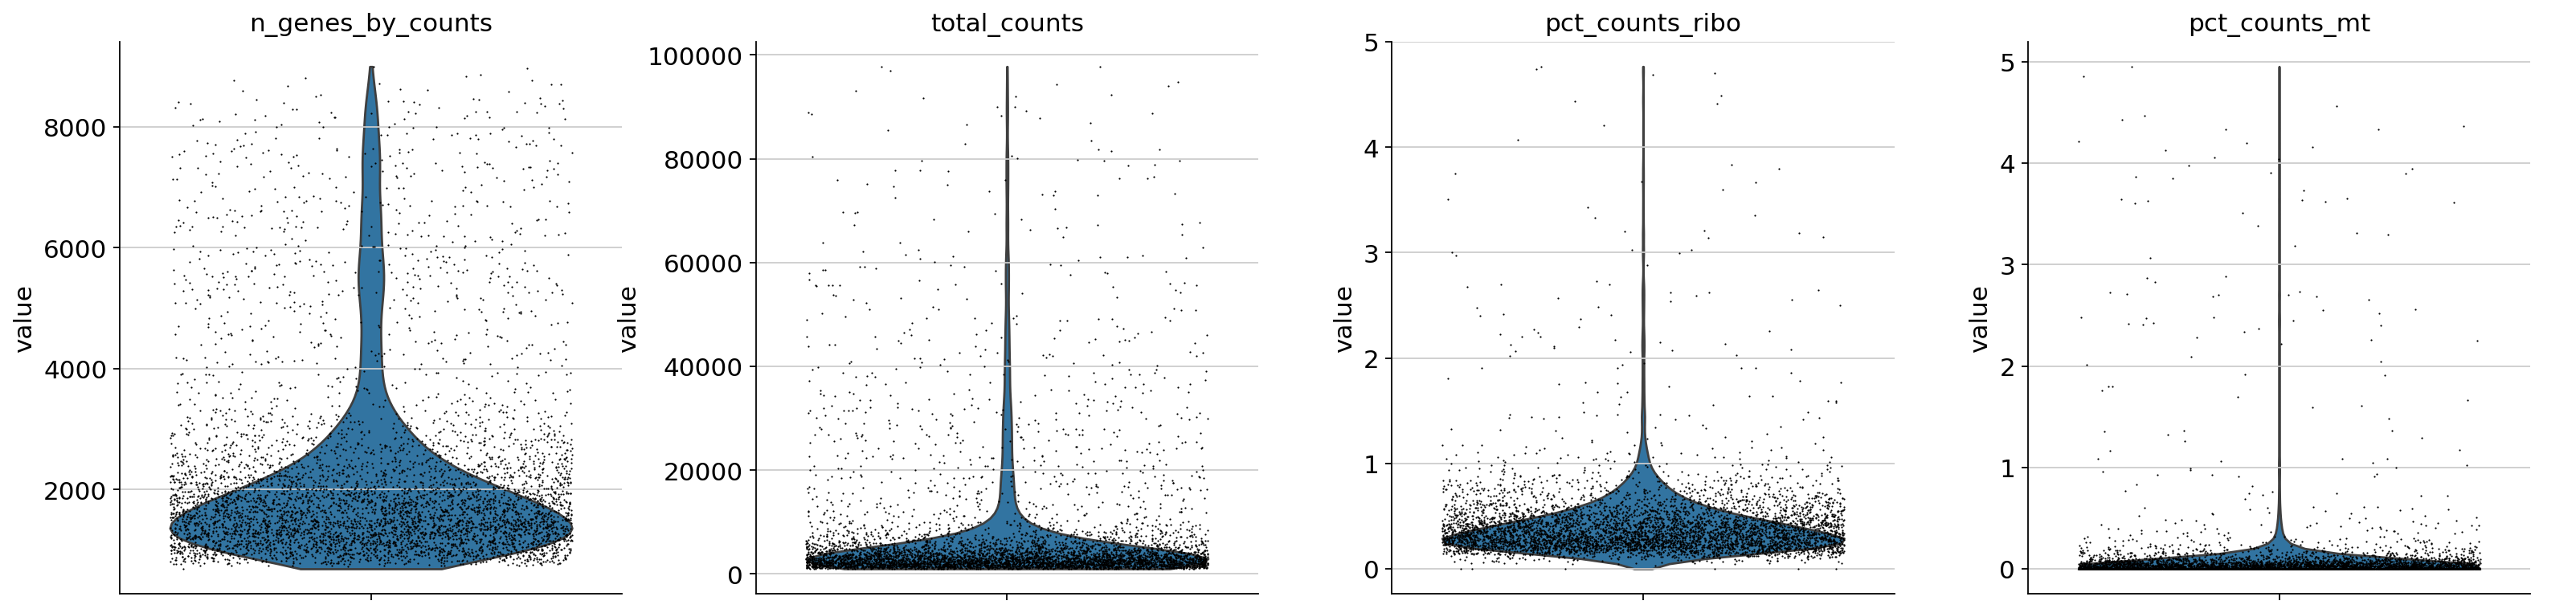

In [ ]:
# annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)
print(adata.var['mt'].value_counts())
adata.obs['pct_counts_mt'] = raw_adata[raw_adata.obs_names.isin(sub_smplist),:].obs['pct_counts_mt']
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo','pct_counts_mt'],jitter=0.4, multi_panel=True, show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_mt_ribo_qc.png"))
#plt.show()

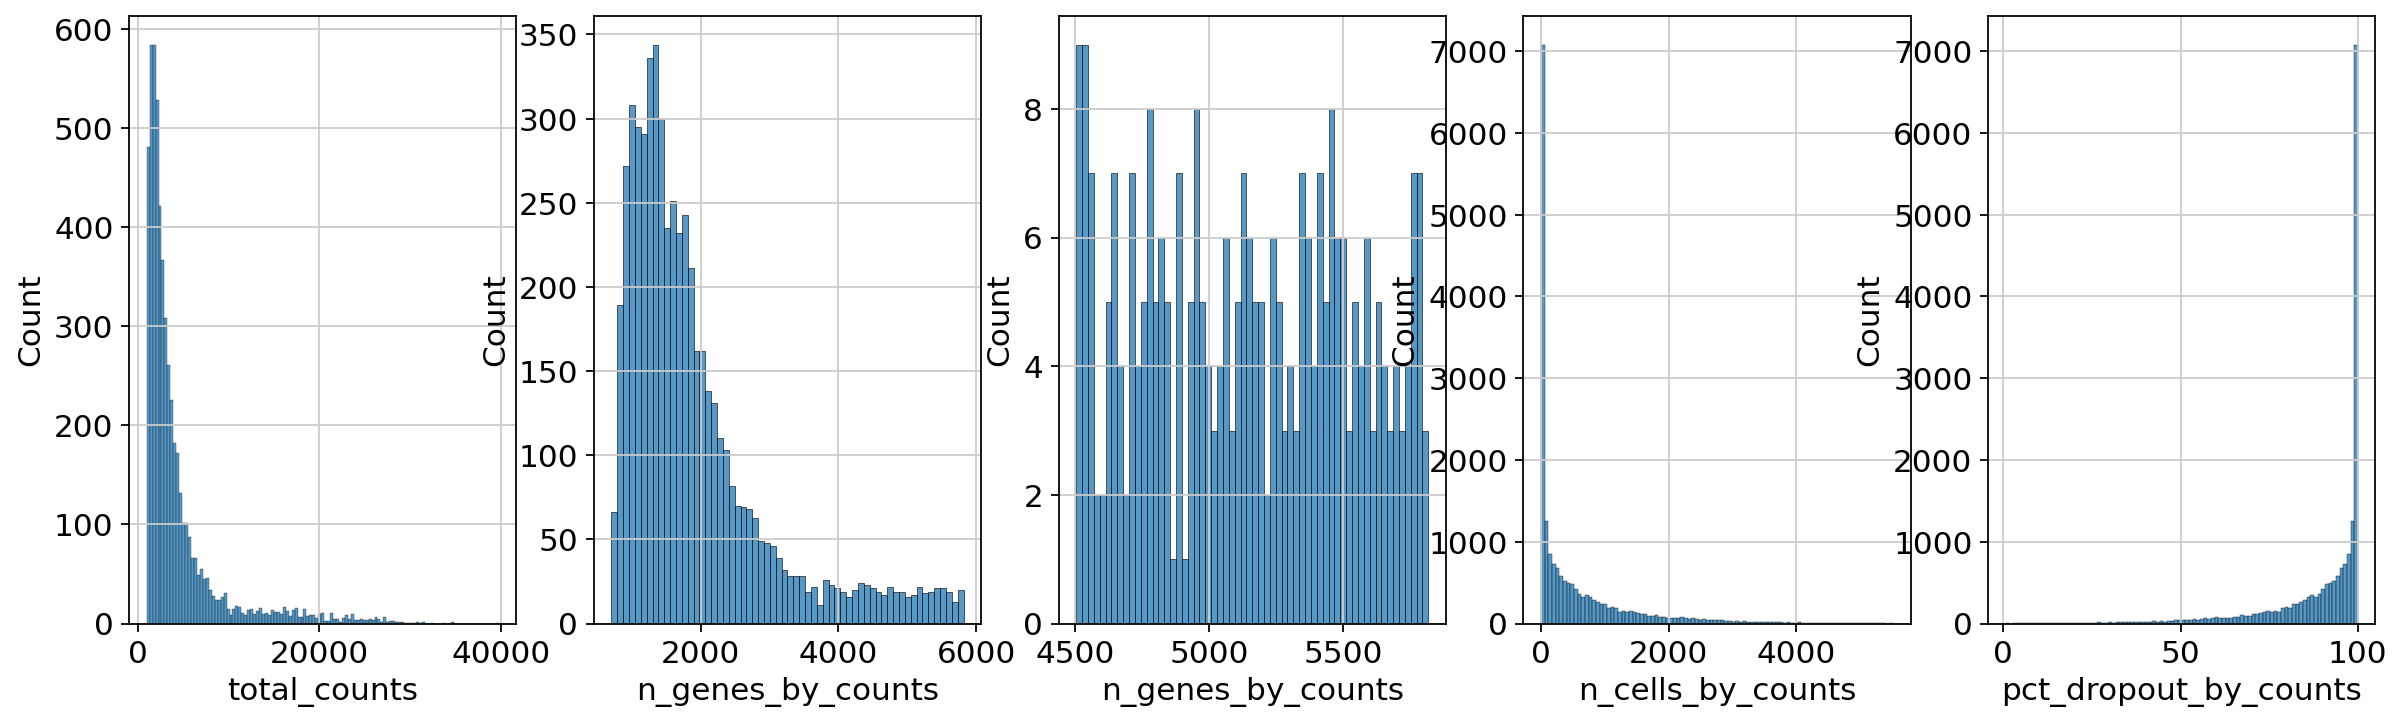

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(18, 5))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"][sub_adata.obs["n_genes_by_counts"] > 4500], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.var["n_cells_by_counts"], kde=False, ax=axs[3])
sns.histplot(adata.var["pct_dropout_by_counts"], kde=False, ax=axs[4])
plt.savefig(os.path.join(output_fig_dir,"glial_counts_dist.png"))


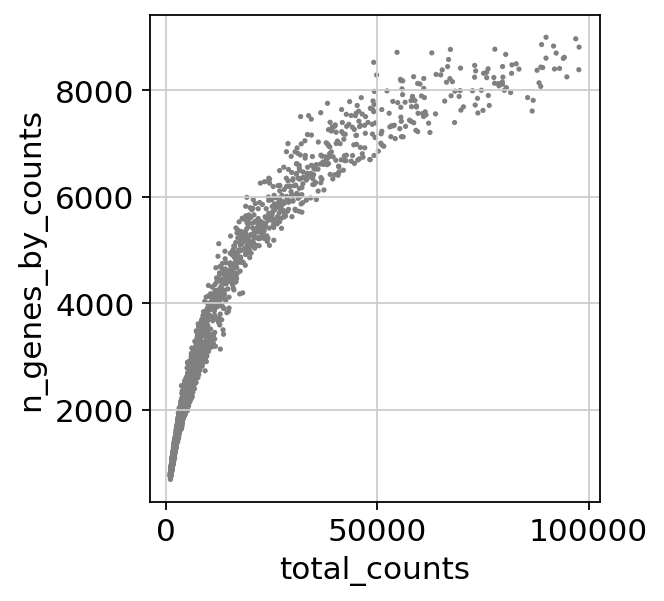

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_genes_by_counts.png"))
#Can color plot based on any variable from obs

In [ ]:
#sc.pp.filter_cells(adata, max_counts=40000)
sc.pp.filter_genes(adata, min_cells=3)
#sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True,save=False)
#plt.savefig(os.path.join(output_fig_dir,"filt_qc.png"))
print(adata)

filtered out 3010 genes that are detected in less than 3 cells
AnnData object with n_obs × n_vars = 5396 × 16985
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors'


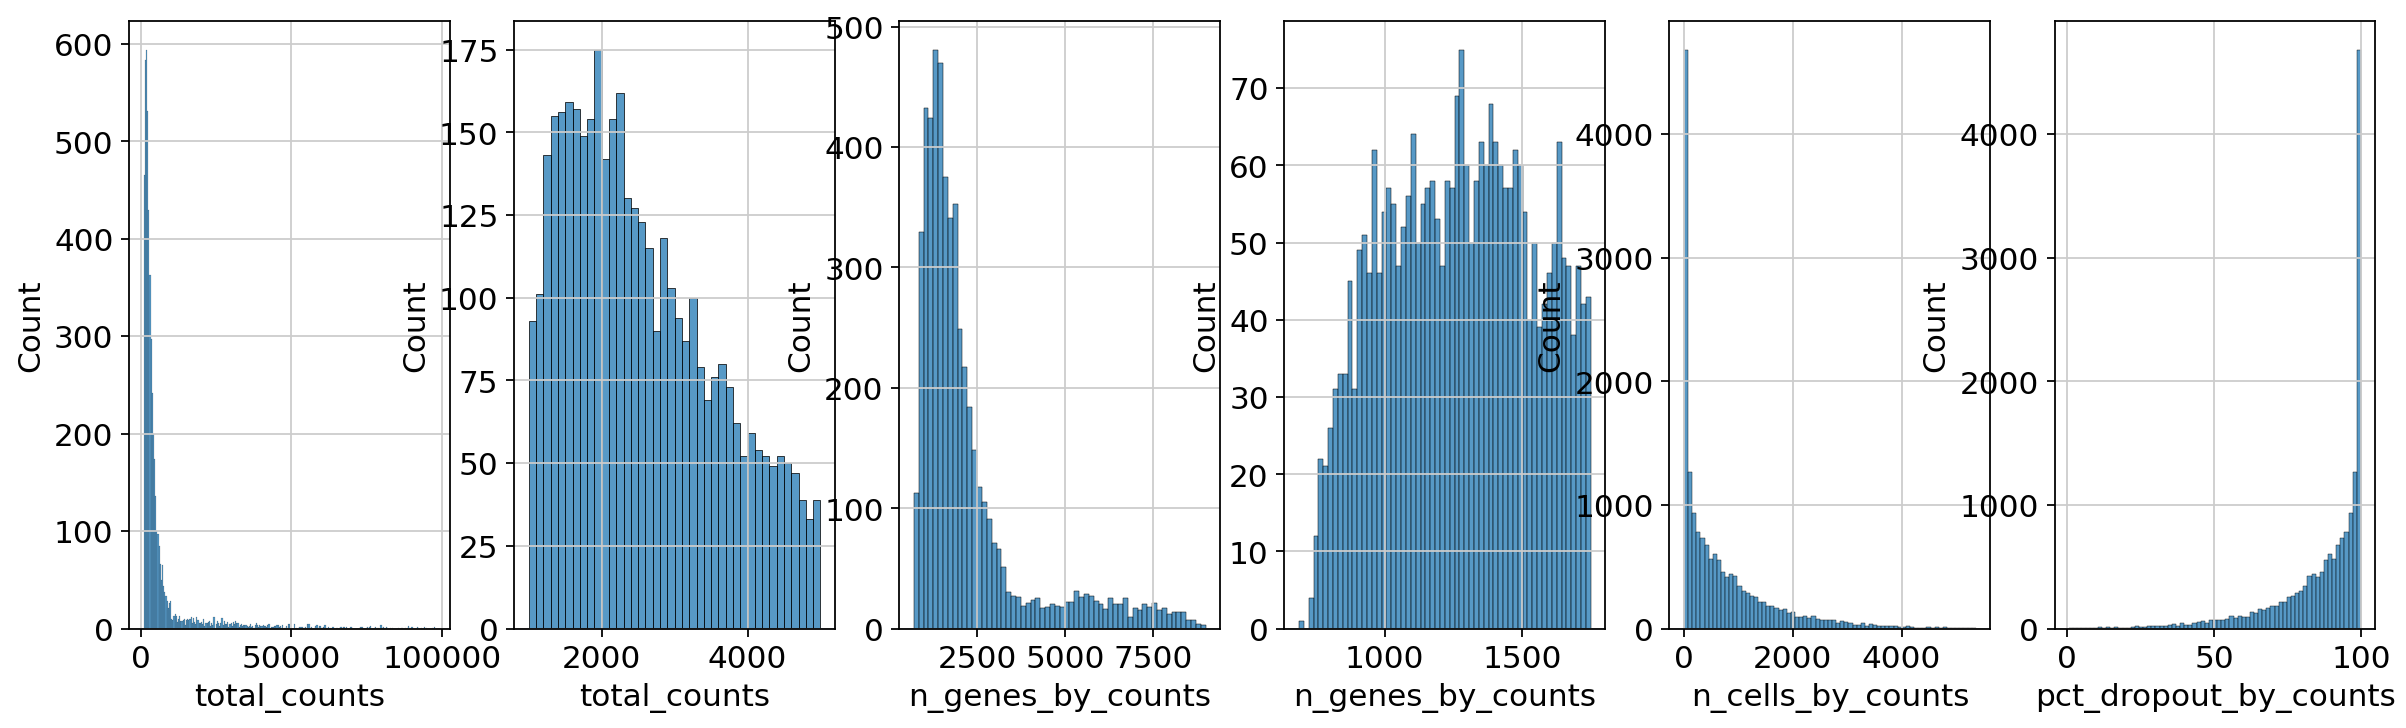

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(18, 5))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 5000], kde=False, bins=40, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 1750], kde=False, bins=60, ax=axs[3])
sns.histplot(adata.var["n_cells_by_counts"], kde=False, ax=axs[4])
sns.histplot(adata.var["pct_dropout_by_counts"], kde=False, ax=axs[5])
plt.savefig(os.path.join(output_fig_dir,"after_filtering_counts_dist.png"))

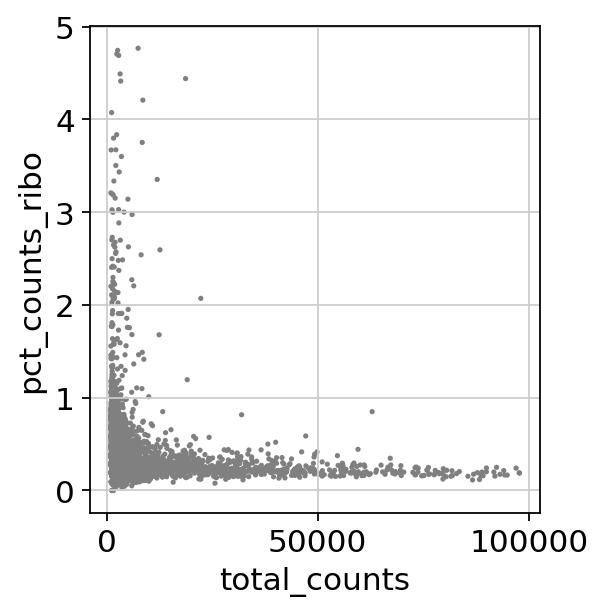

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo',show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_ribo_counts.png"))
#there are cells with zero or very low ribosomal gene expression, should be filtered out or not?

In [ ]:
#normalization
#normalize to 10000 reads, log transformed,
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

In [ ]:
#Identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.012, max_mean=3, min_disp=0.5, flavor="seurat", batch_key='sample')
sc.pl.highly_variable_genes(adata,show=False)
plt.savefig(os.path.join(output_fig_dir,"glail_highly_variable_genes.png"))
print(len(adata.var_names[adata.var.highly_variable]))

In [ ]:
#save normalized adata
adata.raw = adata

In [ ]:
hvg_df = pd.DataFrame()
hvg_df['gene'] = adata.var_names
hvg_df['hvg'] = adata.var.highly_variable.tolist()
hvg_df.to_csv(os.path.join(output_data_dir,"glial_hvg.txt"),index=False,sep="\t")

In [ ]:
#ribosomal genes in highly variable genes
hvg_gene = adata.var_names[adata.var.highly_variable]
print(hvg_gene[hvg_gene.str.startswith('Rpl')])
print(hvg_gene[hvg_gene.str.startswith('Rps')])

In [ ]:
#The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. In that case, the step actually do the filtering below is unnecessary, too.

#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed, and ribosomal gene expressed. Scale the data to unit variance.
adata = adata[:, adata.var.highly_variable]


sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt','pct_counts_ribo'])
#Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)
#remove mt genes, and sex genes before clustering

gene_screenfile="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat/Rat_chrXYMT_gene.txt"
rm_genelist = pd.read_csv(gene_screenfile,sep="\t",header=None)
rm_genelist.columns = ["gene"]
print(rm_genelist)
filt_gene = adata.var_names[~adata.var.gene_ids.isin(rm_genelist['gene'])]
adata = adata[:,filt_gene]

In [ ]:
ribo_genes = adata.var_names[adata.var.ribo]
print(ribo_genes)
#remove ribo genes
adata = adata[:, ~adata.var_names.isin(ribo_genes)]

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


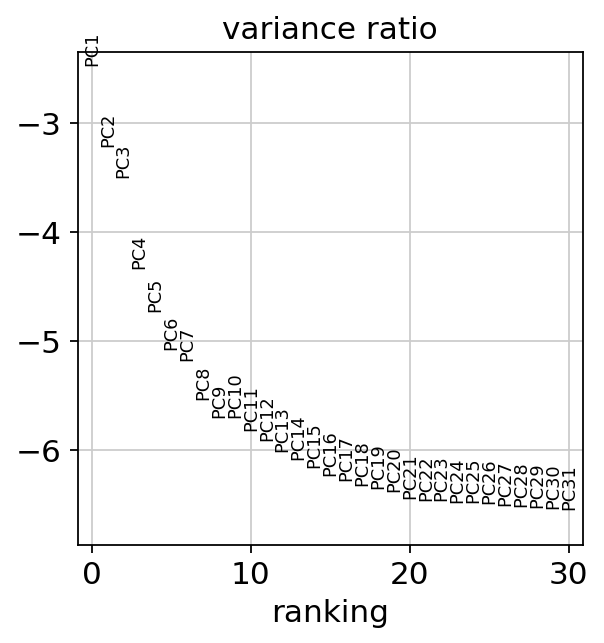

In [ ]:
#Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, log=True,show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_pca_var_ratio.png"))

In [ ]:
#batch correction
sc.external.pp.harmony_integrate(adata, 'sample')
#replcae PCA by the batch corrected data
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)


In [ ]:
sc.tl.leiden(adata, resolution=0.5)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


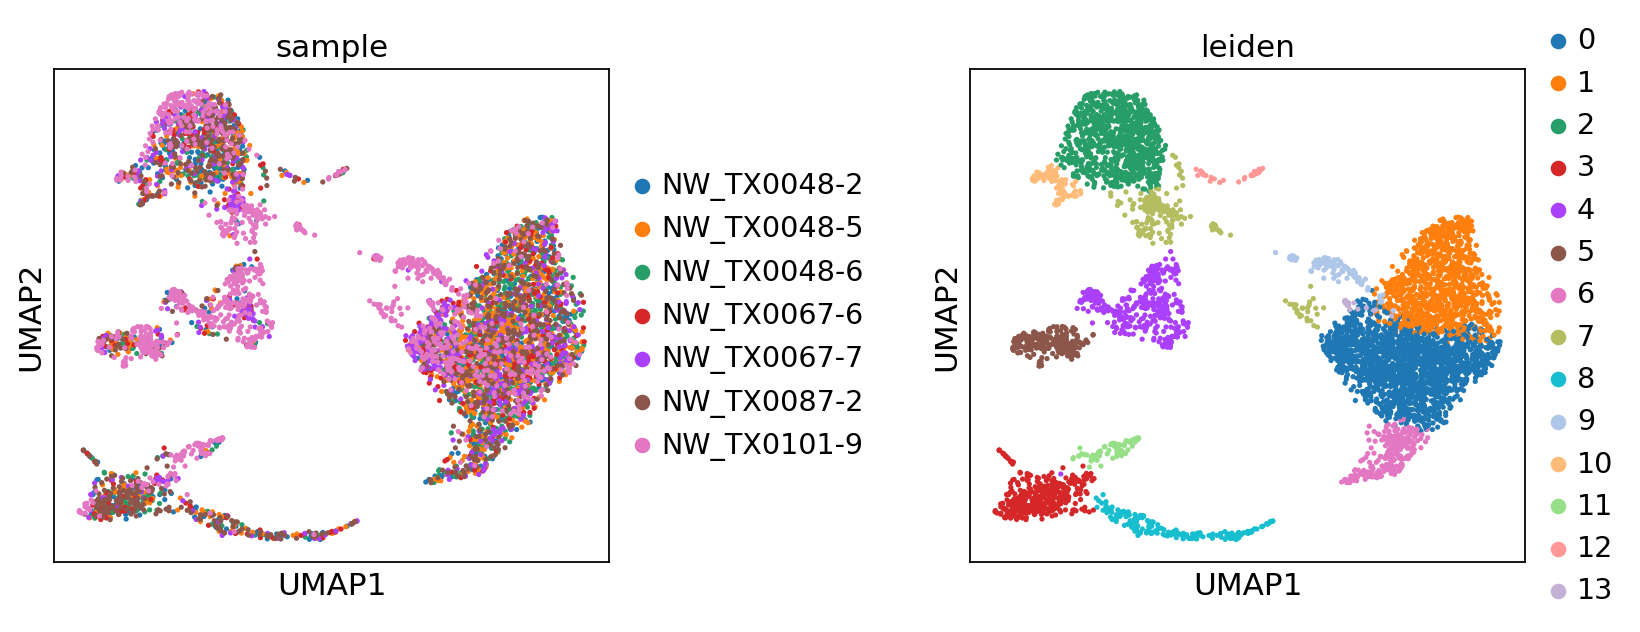

In [ ]:
sc.pl.umap(adata, color=["sample","leiden"], cmap="tab20",show=False,wspace=0.5)
plt.savefig(os.path.join(output_fig_dir,"glial_Harmony_umap_by_sample.png"))

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


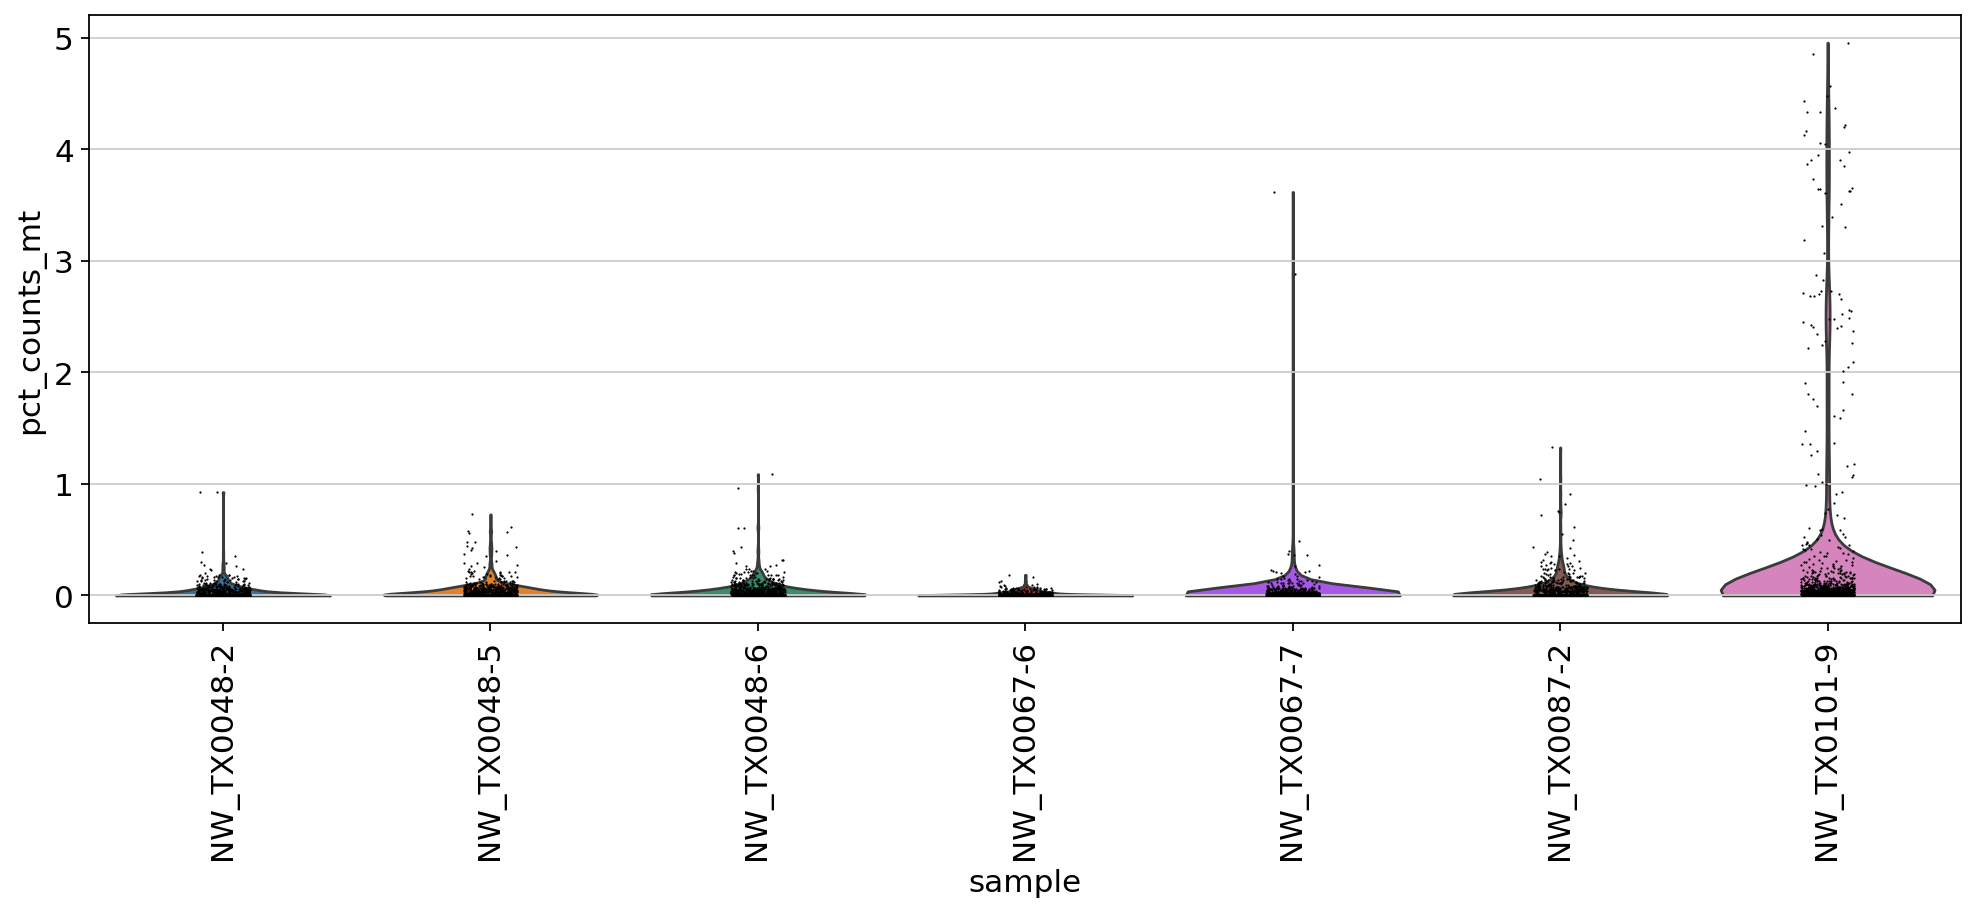

In [ ]:

fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="pct_counts_mt", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"glial_hvg_pct_counts_mt.png"),bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="pct_counts_ribo", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"glial_hvg_pct_counts_ribo.png"),bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="doublet_score", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"glial_hvg_doublet_score_class.png"),bbox_inches="tight")

In [ ]:
adata_cpy = adata[adata.obs['sample'] == "NW_TX0101-9",:]
print(adata_cpy)
adata_cpy = adata_cpy[adata_cpy.obs['pct_counts_mt'] < 3,:]
adata_cpy = adata_cpy[adata_cpy.obs['pct_counts_ribo'] < 4,:]
print(adata_cpy)

In [ ]:
#calculate paga & plot
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False,show =False,use_raw=True)  # remove `plot=False` if you want to see the coarse-grained graph
#plt.savefig(os.path.join(output_dir,"paga_leiden_cluster.png"))

In [ ]:
#show which genes are active in which clusters for the three overall clusters (umap)
sc.tl.umap(adata, init_pos='paga')

In [ ]:
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True)

In [ ]:
#Get the most variable genes that define each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_level2_rank_genes_groups.png"))

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby="leiden");

In [ ]:
#class 13 hvg are mt genes
mt_genes = adata.var_names.str.startswith('Mt-')
print(sum(mt_genes))
#remove class 13
adata = adata[adata.obs.leiden != "13",:]
print(adata)

In [ ]:
del adata.uns['dendrogram_leiden']
sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, log=True,show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_pca_var_ratio.png"))

#batch correction
sc.external.pp.harmony_integrate(adata, 'sample')
#replcae PCA by the batch corrected data
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

In [ ]:
sc.tl.leiden(adata, resolution=1)
#calculate paga & plot
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False,show =False,use_raw=True)  # remove `plot=False` if you want to see the coarse-grained graph
#plt.savefig(os.path.join(output_dir,"paga_leiden_cluster.png"))
sc.tl.umap(adata, init_pos='paga')

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [ ]:
##marker genes from the paper
marker_genes = []
Astro = ["Gli3","Slc39a12"]
Oligo = ["Gjc3"]
Endo = ["Adgrl4","Slco1a4"]
VLMC = ["Eya2"] #,"Foxd1"]
OPC = ["Pdgfra","Stk32a"]
Peri = ["Abcc9"] #"Tbx3os1",
SMC = [] #Acta2
Micro = ["Hexb"]
Micro_PVM = ["Inpp5d"]

marker_genes = Astro + Oligo + Endo + VLMC + OPC + Peri + SMC + Micro + Micro_PVM
marker_genes.append("Gad1")
marker_genes.append("Sv2b")
marker_genes.append("Bnc2")
marker_genes.append("Lama1")

In [ ]:
Astro = ["1","10","11"]
opc = ["5","18"]
peri = ["16"]
endo = ["16"] #Slcola4
oligo = ["2","3","0","4","7","8","14","13"]

micro_pvm = ["9"] #marker Slco2b1
micro = ["6"]
#12,15,17
oligo_neuron = ["12","17"]
smc_vlmc = ["15"]
#VLMC = ["4","11","19"]
#SMC = ["17"] #guessed
astro_smps = adata.obs_names[adata.obs.leiden.isin(Astro)]
opc_smps = adata.obs_names[adata.obs.leiden.isin(opc)]
endo_peri_smps = adata.obs_names[adata.obs.leiden.isin(peri)]
#endo_smps = adata.obs_names[adata.obs.leiden.isin(endo)]
oligo_smps = adata.obs_names[adata.obs.leiden.isin(oligo)]
micro_pvm_smps = adata.obs_names[adata.obs.leiden.isin(micro_pvm)]
micro_smps = adata.obs_names[adata.obs.leiden.isin(micro)]
oligo_neuron_smps = adata.obs_names[adata.obs.leiden.isin(oligo_neuron)]
smc_vlmc_smps = adata.obs_names[adata.obs.leiden.isin(smc_vlmc)]

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


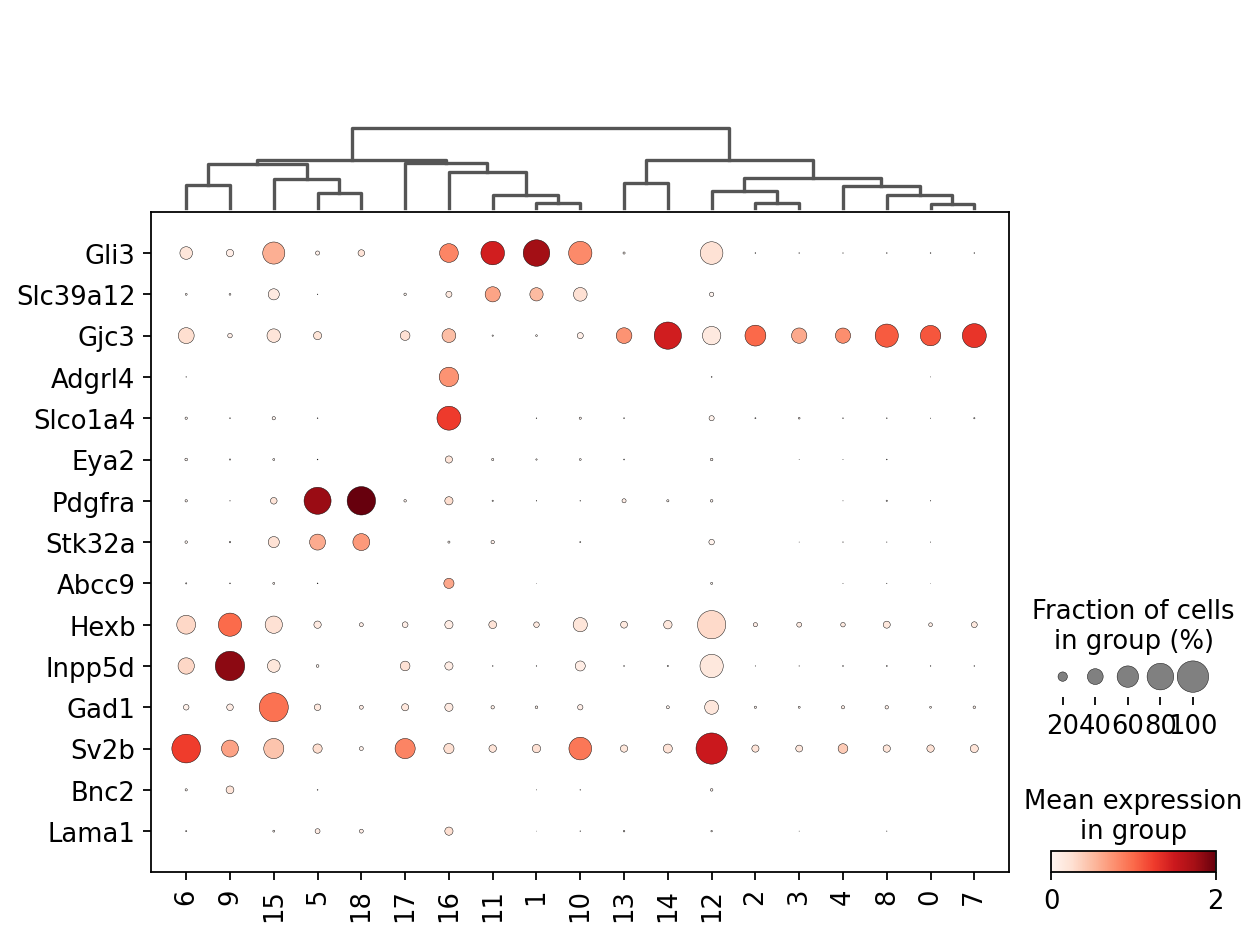

In [ ]:
#del adata.uns['rank_genes_groups']
#del adata.uns['dendrogram_leiden']
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True)
plt.savefig(os.path.join(output_fig_dir,"glial_level3_dotplot.png"))

In [ ]:
#Get the most variable genes that define each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=False)
plt.savefig(os.path.join(output_fig_dir,"glial_level2_rank_genes_groups.png"))

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

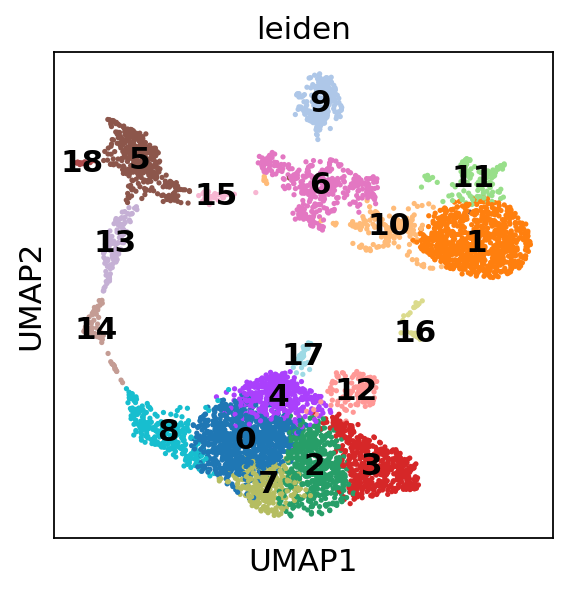

In [ ]:
sc.pl.umap(adata, color=["leiden"], cmap="tab20",show=False,legend_loc="on data")
plt.savefig(os.path.join(output_fig_dir,"glial_level3_leigen_id.png"))

In [ ]:
#print(adata)
cls =13
mg = []
for i in range(30):
    mg.append(adata.uns['rank_genes_groups']['names'][i][cls])

print(mg)
marker_genes = marker_genes + mg
#marker_g1 = [g for g in adata.uns['rank_genes_groups']['names'][1]]
#marker_g2 = [g for g in adata.uns['rank_genes_groups']['names'][2]]

['Bcas1', 'Fyn', 'Opcml', 'Tnr', 'Tns3', 'Ptprt', 'Trio', 'Arhgap24', 'Sema5a', 'Sirt2', 'LOC103692025', 'Tmem108', 'Sema5b', 'Itpr2', 'Epb41l2', 'Cdk14', 'Mpzl1', 'Arhgap35', 'Ptpro', 'Ptprj', 'Ppfibp1', 'Kazn', 'Vcan', 'Cdh20', 'Phyhipl', 'Tcf7l2', 'Sh3rf1', 'Pcdh7', 'Sox6', 'Ptpre']


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


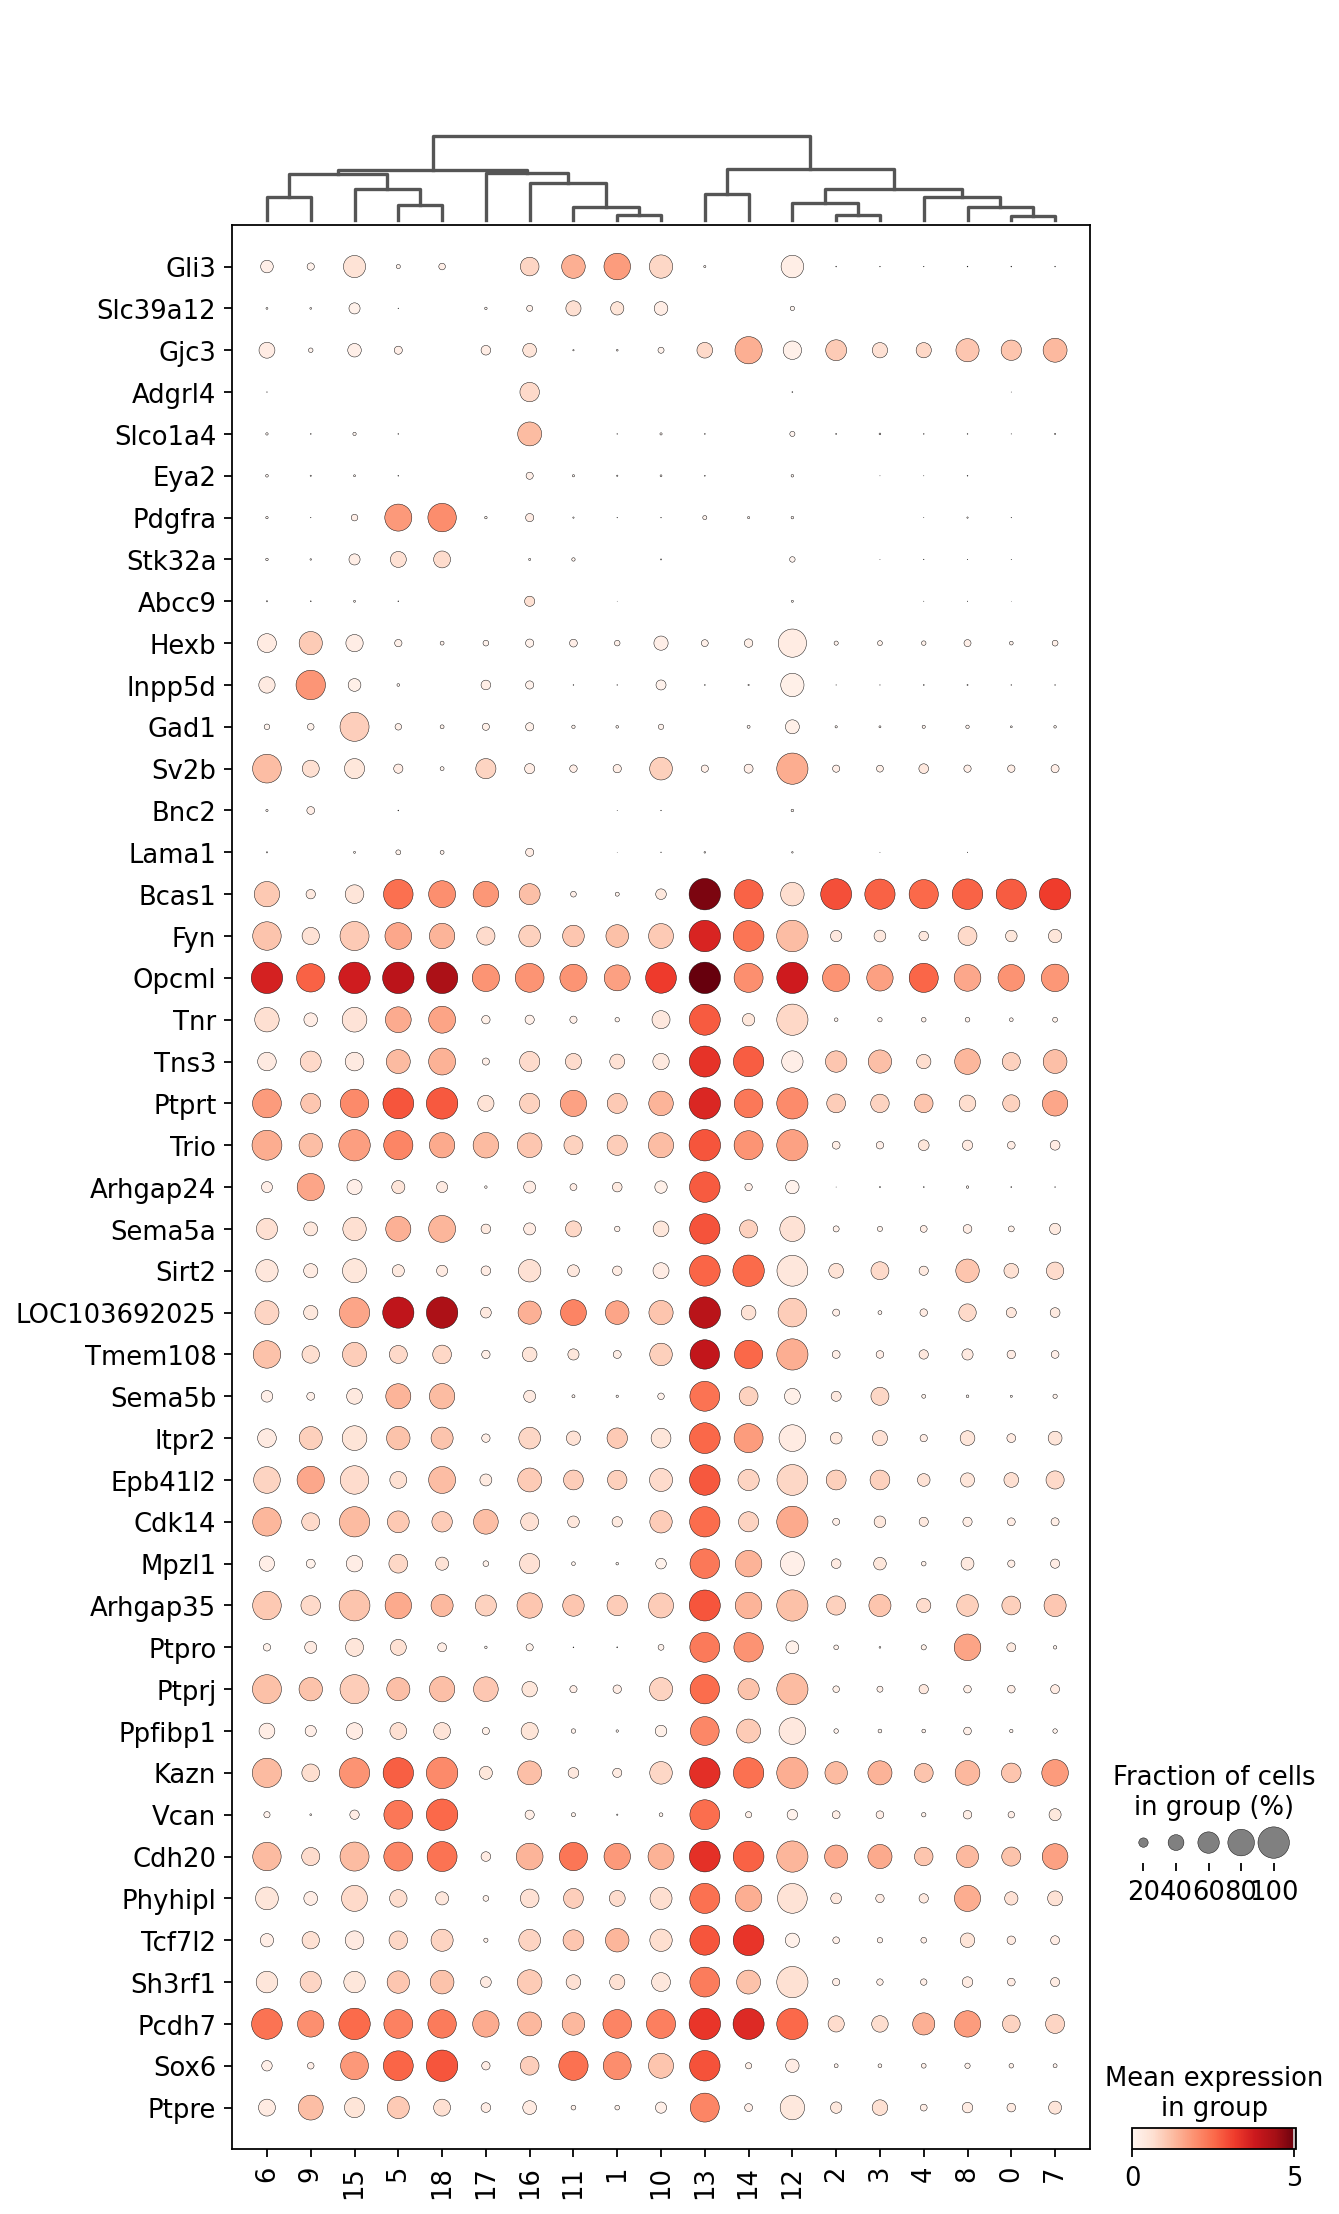

In [ ]:
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True)

In [ ]:
adata.obs['subclass'] = np.empty([adata.n_obs], dtype=str)
for i in astro_smps:
  adata.obs.loc[i, 'subclass'] = 'Astro'
for i in opc_smps:
  adata.obs.loc[i, 'subclass'] = 'OPC'
for i in endo_peri_smps:
  adata.obs.loc[i, 'subclass'] = 'Endo/Peri'
for i in oligo_smps:
  adata.obs.loc[i, 'subclass'] = 'Oligo'
for i in micro_pvm_smps:
  adata.obs.loc[i, 'subclass'] = 'Micro_PVM'
for i in micro_smps:
  adata.obs.loc[i, 'subclass'] = 'Micro'
for i in oligo_neuron_smps:
  adata.obs.loc[i, 'subclass'] = 'Oligo Neuron'
for i in smc_vlmc_smps:
  adata.obs.loc[i, 'subclass'] = 'SMC/VLMC'

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


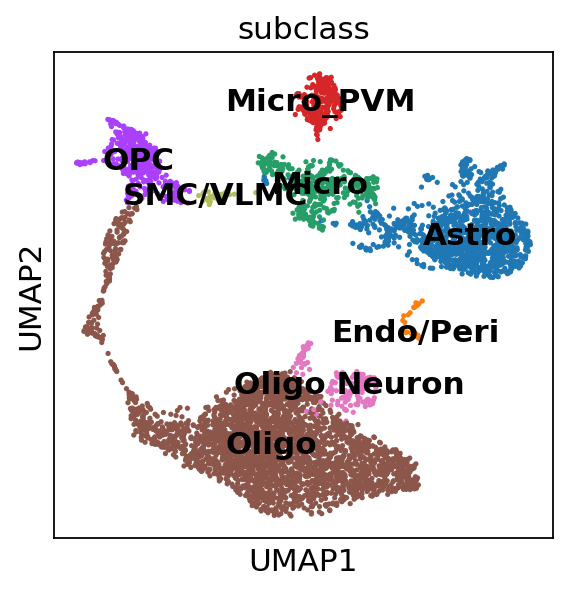

In [ ]:
sc.pl.umap(adata, color=["subclass"], cmap="tab20",show=False,legend_loc="on data")
plt.savefig(os.path.join(output_fig_dir,"glial_subclass.png"))

In [ ]:
!pip install adjustText
from adjustText import adjust_text

def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


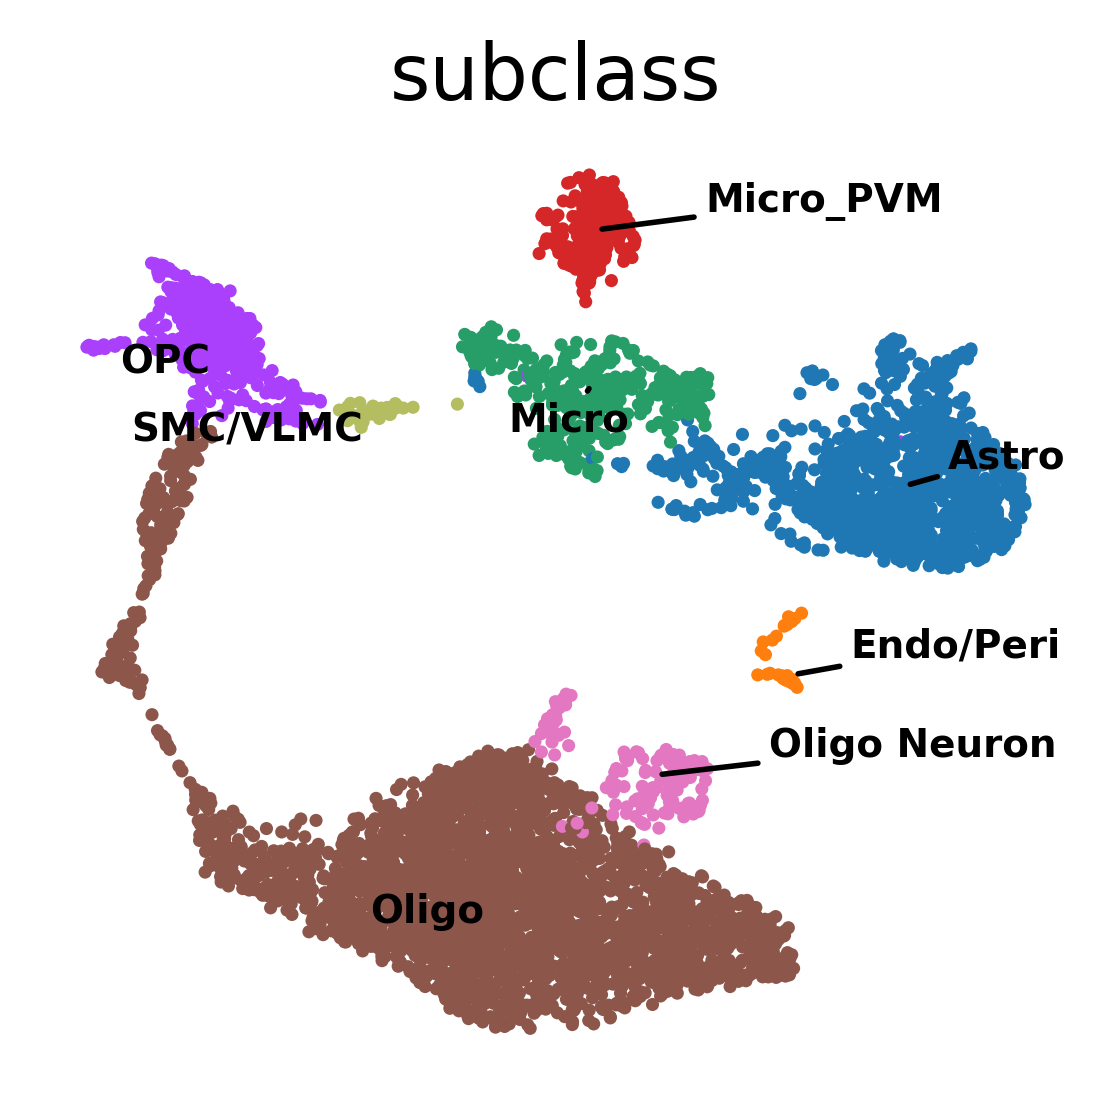

In [ ]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": 200, "figure.frameon": False}):
    ax = sc.pl.umap(adata, color="subclass", show=False, legend_loc=None, frameon=False)
    gen_mpl_labels(
        adata,
        "subclass",
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=7,fontweight='bold'),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(output_fig_dir,"glial_subclass_umap.png"))

In [ ]:
adata.obs['cluster_label'] = np.empty([adata.n_obs], dtype=str)
adata.obs.loc[adata.obs.leiden == "1", 'cluster_label'] = 'Astro1'
adata.obs.loc[adata.obs.leiden == "10", 'cluster_label'] = 'Astro2'
adata.obs.loc[adata.obs.leiden == "11", 'cluster_label'] = 'Astro3'
adata.obs.loc[adata.obs.leiden == "5", 'cluster_label'] = 'OPC1'
adata.obs.loc[adata.obs.leiden == "18", 'cluster_label'] = 'OPC2'
adata.obs.loc[adata.obs.leiden == "16", 'cluster_label'] = 'Endo_peri'
adata.obs.loc[adata.obs.leiden == "2", 'cluster_label'] = 'Oligo1'
adata.obs.loc[adata.obs.leiden == "3", 'cluster_label'] = 'Oligo2'
adata.obs.loc[adata.obs.leiden == "0", 'cluster_label'] = 'Oligo3'
adata.obs.loc[adata.obs.leiden == "4", 'cluster_label'] = 'Oligo4'
adata.obs.loc[adata.obs.leiden == "7", 'cluster_label'] = 'Oligo5'
adata.obs.loc[adata.obs.leiden == "8", 'cluster_label'] = 'Oligo6'
adata.obs.loc[adata.obs.leiden == "14", 'cluster_label'] = 'Oligo7'
adata.obs.loc[adata.obs.leiden == "13", 'cluster_label'] = 'Oligo8'
adata.obs.loc[adata.obs.leiden == "9", 'cluster_label'] = 'Micro_PVM'
adata.obs.loc[adata.obs.leiden == "6", 'cluster_label'] = 'Micro'
adata.obs.loc[adata.obs.leiden == "12", 'cluster_label'] = 'Oligo_neuron1'
adata.obs.loc[adata.obs.leiden == "17", 'cluster_label'] = 'Oligo_neuron2'
adata.obs.loc[adata.obs.leiden == "15", 'cluster_label'] = 'SMC_VLMC'


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


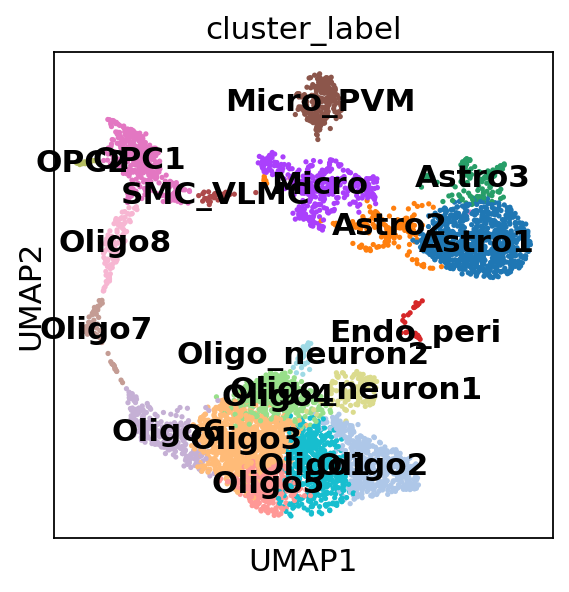

In [ ]:
sc.pl.umap(adata, color=["cluster_label"], cmap="tab20",show=False,legend_loc="on data")
plt.savefig(os.path.join(output_fig_dir,"glial_level3_cluster_label.png"))

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


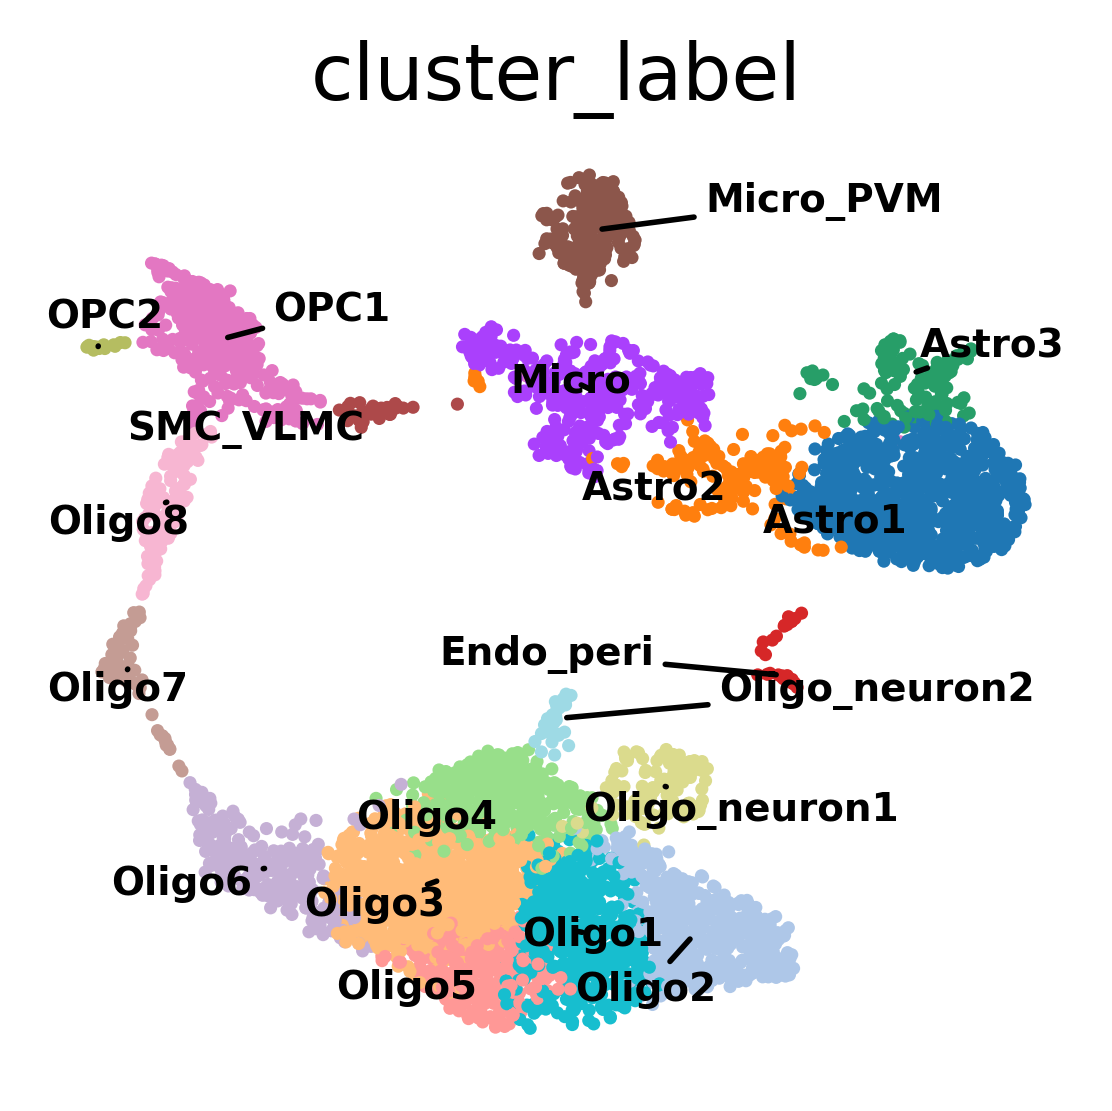

In [ ]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": 200, "figure.frameon": False}):
    ax = sc.pl.umap(adata, color="cluster_label", show=False, legend_loc=None, frameon=False)
    gen_mpl_labels(
        adata,
        "cluster_label",
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=7,fontweight='bold'),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(output_fig_dir,"glial_level3_umap.png"))

In [ ]:
adata.write_h5ad(os.path.join(output_data_dir,"glial_level2_level3_cluster.h5ad"),compression='gzip')